#### Lesson: Asset Pricing I: Finite State Models

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import quantecon as qe
from numpy.linalg import eigvals, solve

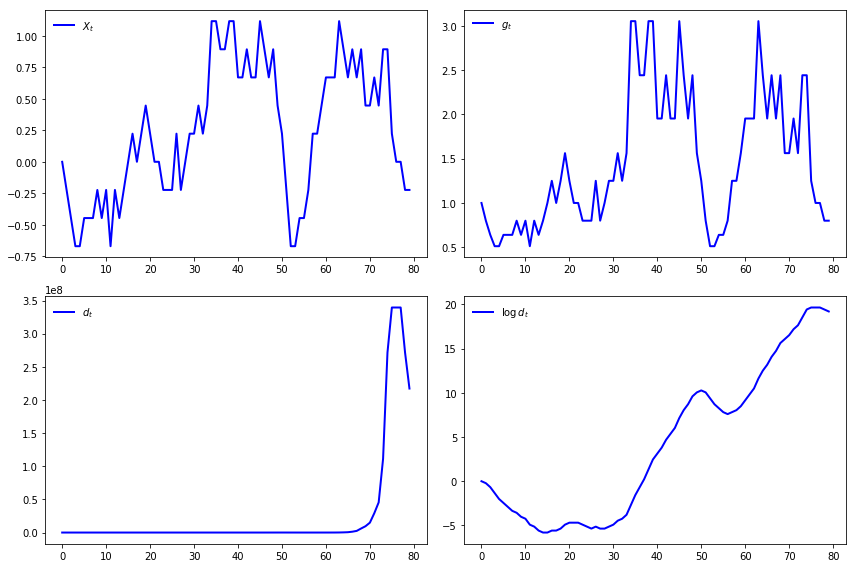

In [2]:
mc = qe.tauchen(0.96, 0.25, n=25)
sim_length = 80

x_series = mc.simulate(sim_length, init=np.median(mc.state_values))
g_series = np.exp(x_series)
d_series = np.cumprod(g_series) # Assumes d_0 = 1

series = [x_series, g_series, d_series, np.log(d_series)]
labels = ['$X_t$', '$g_t$', '$d_t$', r'$\log \, d_t$']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for ax, s, label in zip(axes.flatten(), series, labels):
    ax.plot(s, 'b-', lw=2, label=label)
    ax.legend(loc='upper left', frameon=False)
plt.tight_layout()
plt.show()

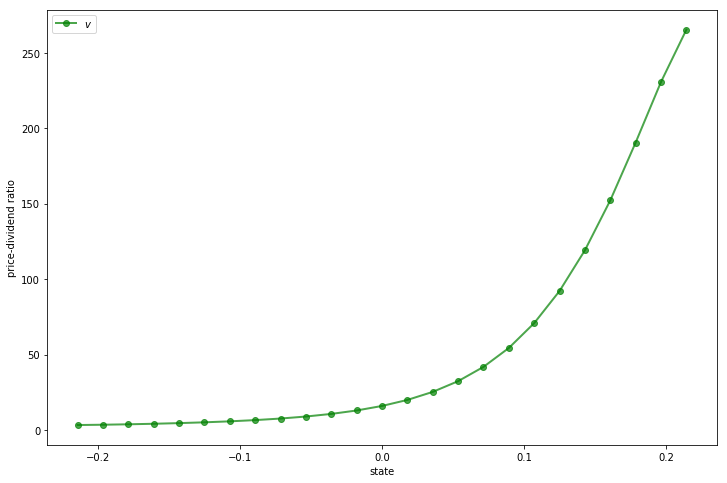

In [3]:
n = 25  # Size of state space
β = 0.9
mc = qe.tauchen(0.96, 0.02, n=n)

K = mc.P * np.exp(mc.state_values)

warning_message = "Spectral radius condition fails"
assert np.max(np.abs(eigvals(K))) < 1 / β,  warning_message

I = np.identity(n)
v = solve(I - β * K, β * K @ np.ones(n))

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(mc.state_values, v, 'g-o', lw=2, alpha=0.7, label='$v$')
ax.set_ylabel("price-dividend ratio")
ax.set_xlabel("state")
ax.legend(loc='upper left')
plt.show()